In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = '/Users/xieewenz/python/Networkx/ChordNetwork/allstuffs2.csv'
df = pd.read_csv(path, names=['ch','y'])#,encoding='ISO-8859-1')# 3rd party packages importing, encoding='ISO-8859-1')
df.head(5)

,ch,y
0,C Am Em G C Am Em Dm7 G7 C Am Em Dm7 Fm C G7 G...,0
1,D7 G7 A7 A7 D7 A7 D7 D7 D7 G7 G7 D7 A7 G7 A7 G...,0
2,G C G F G G C G F G C D G C G G C G F G G C G ...,0
3,E C#m E C#m F#m Am E E C#m E C#m F#m Am E E A ...,0
4,D7 G G C G D7 G C D7 G D7 G D7 G D7 G A7 D7 G ...,0


In [3]:
x = df['ch']
y = df['y']

In [4]:
# x,y

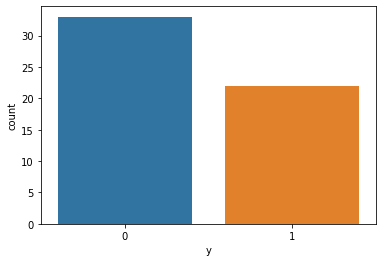

In [5]:
sns.countplot(y)  

In [6]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33)
print(x_train.size)
print(x_test.size)
print(type(y_train))

36
19
<class 'pandas.core.series.Series'>


In [7]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vect = CountVectorizer(ngram_range=(4,4),lowercase=False, token_pattern='[\w#\d]+').fit(x_train)
train_df_vectorized = vect.transform(x_train)
# print(vect.inverse_transform(train_df_vectorized[10]))
# print(train_df_vectorized)
vect_tfidf = TfidfVectorizer(ngram_range=(4,4),min_df=2,max_df=0.5,lowercase=False, token_pattern='[\w#\d]+').fit(x_train)
train_df_vectorized_tfidf = vect_tfidf.transform(x_train)

In [8]:
print(vect.inverse_transform(train_df_vectorized[2]))
# print(x.iloc[0])
# print(train_df_vectorized_tfidf[0])

[array(['A7 D A D', 'A7 D G7 D', 'A7 G7 A7 G7', 'A7 G7 G7 D', 'D A D A6',
       'D A7 G7 A7', 'D D G7 D', 'D G7 A7 D', 'D G7 D A7', 'D G7 D G7',
       'G7 A7 D A', 'G7 A7 D G7', 'G7 A7 G7 G7', 'G7 D A7 G7',
       'G7 D G7 A7', 'G7 G7 D G7'], dtype='<U17')]


In [9]:

from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
y_train = LB.fit_transform(y_train)
y_test = LB.transform(y_test)
print(y_train)

[0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0]


In [10]:

from sklearn.naive_bayes import MultinomialNB
clfrNB = MultinomialNB(alpha = 0.2)
clfrNB.fit(train_df_vectorized, y_train)
clfrNB_tfidf = MultinomialNB(alpha = 0.2)
clfrNB_tfidf.fit(train_df_vectorized_tfidf, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [11]:

from sklearn.metrics import roc_auc_score,accuracy_score
acc_nb_tfidf = accuracy_score(clfrNB_tfidf.predict(vect_tfidf.transform(x_test)),y_test)
acc_nb_cv = accuracy_score(clfrNB.predict(vect.transform(x_test)),y_test)
print("accuracy using tfidf vectorizer and Naive Bayes model is: " +str(acc_nb_tfidf) )
print("accuracy using count vectorizer and Naive Bayes model is: " +str(acc_nb_cv) )

accuracy using tfidf vectorizer and Naive Bayes model is: 0.7368421052631579
accuracy using count vectorizer and Naive Bayes model is: 0.8421052631578947


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,accuracy_score
from matplotlib import pyplot as plt

In [13]:
tfidfacc = []
countacc = []

for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)
    vect = CountVectorizer(ngram_range=(1,1),lowercase=False, token_pattern='[\w#\d]+').fit(x_train)
    train_df_vectorized = vect.transform(x_train)
    vect_tfidf = TfidfVectorizer(ngram_range=(1,1),min_df=2,max_df=0.5,lowercase=False, token_pattern='[\w#\d]+').fit(x_train)
    train_df_vectorized_tfidf = vect_tfidf.transform(x_train)
    LB = LabelEncoder()
    y_train = LB.fit_transform(y_train)
    y_test = LB.transform(y_test)
    clfrNB = MultinomialNB(alpha = 0.2)
    clfrNB.fit(train_df_vectorized, y_train)
    clfrNB_tfidf = MultinomialNB(alpha = 0.2)
    clfrNB_tfidf.fit(train_df_vectorized_tfidf, y_train)
    acc_nb_tfidf = accuracy_score(clfrNB_tfidf.predict(vect_tfidf.transform(x_test)),y_test)
    acc_nb_cv = accuracy_score(clfrNB.predict(vect.transform(x_test)),y_test)
    tfidfacc.append(acc_nb_tfidf)
    countacc.append(acc_nb_cv)

In [14]:
[sum(tfidfacc)/1000,sum(countacc)/1000]

[0.8450588235294163, 0.8788823529411836]

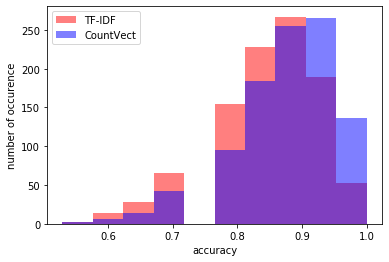

In [15]:
plt.xlabel('accuracy')
plt.ylabel('number of occurence')
plt.hist(tfidfacc, color='red', alpha=0.5, label='TF-IDF')
plt.hist(countacc, color='blue', alpha=0.5, label='CountVect')
plt.legend()

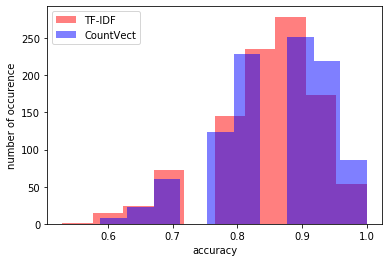

<BarContainer object of 2 artists>

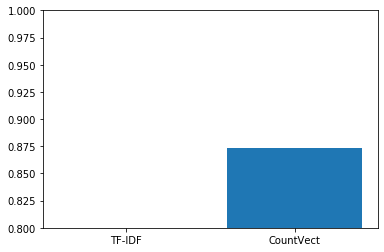

In [39]:
plt.ylim(0.8,1)
plt.bar(["TF-IDF",'CountVect'],[sum(tfidfacc)/10,sum(countacc)/10])

first page data -- possibility of confounding vairable

> tfidf:0.9488888888888889,  count:0.9688888888888888

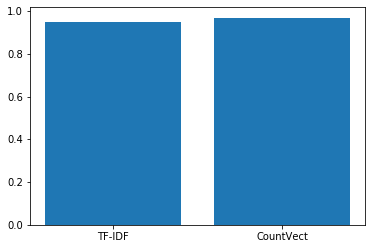